In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import SimpleITK as sitk

643.0


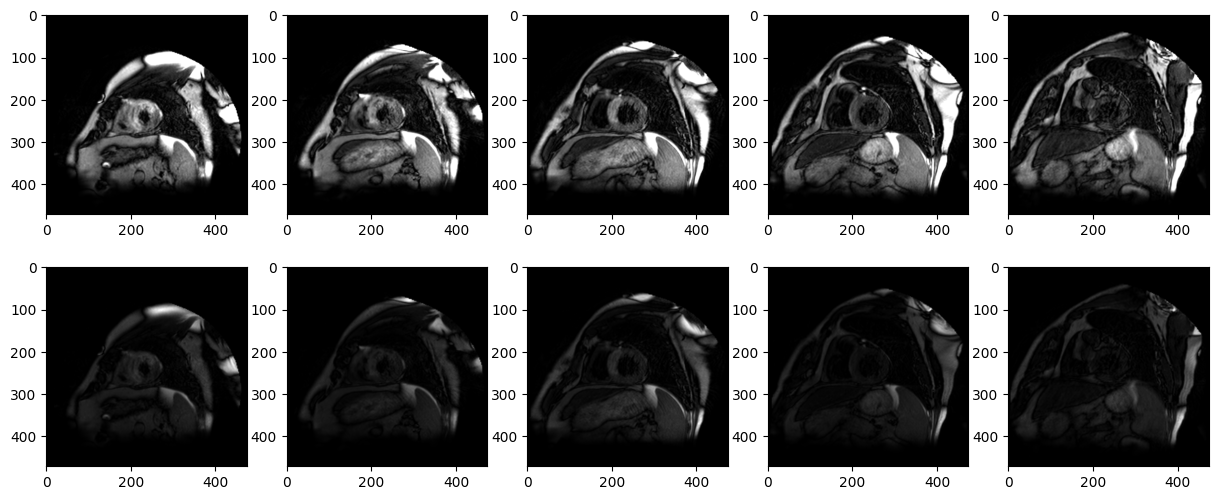

In [7]:
# 读取NIfTI图像
import SimpleITK as sitk
input_filepath="./dataset/T2/patient1_T2.nii.gz"
image = sitk.ReadImage(input_filepath)
        
        # 将图像转换为NumPy数组
image_array = sitk.GetArrayFromImage(image)
unique=np.unique(image_array)

# 定义映射范围
min_value = 0
max_value = np.percentile(image_array, 97.5)
mapped_min = 0
mapped_max = 254
array=image_array
# 使用clip函数将值限制在指定范围内
clipped_array = np.clip(array, min_value, max_value)

# 进行线性映射
mapped_array = (clipped_array - min_value) * (mapped_max - mapped_min) / (max_value - min_value) + mapped_min

# 对大于阈值的值进行特殊映射
mapped_array[array > max_value] = 255
# 将映射后的值四舍五入为整数
mapped_array = np.round(mapped_array).astype(int)
print(max_value)

colunm=mapped_array.shape[0]
# 显示图像
fig, axes = plt.subplots(2, colunm, figsize=(15,6))
for i in range(colunm):
    axes[0,i].imshow(mapped_array[i,:,:],cmap='gray')
    axes[1,i].imshow(image_array[i,:,:],cmap='gray')
plt.show()
